In [1]:
from scipy.spatial import cKDTree

%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
sys.path.append('../src')
sys.path.append('../daaad/')
sys.path.append('../daaad/src')

import numpy as np
from daaad.src.models.cae import CondVAEModel
from data_io import get_spiral_data
from cvae_utils import get_design_error, train_cvae
import matplotlib.pyplot as plt

np.random.seed(42)
# Number of spectral modes to be used
num_modes = 2
# Name of the model
model_name = f'spiral_{num_modes}modes'
# Fraction of data to be used (between 0 and 1)
data_fraction = 1.
# Whether only frequencies or also modal masses should be considered
only_freqs = False
# Training end testing parameters
batch_size = 128
val_split = .1
test_split  = .1
# This is just a correction factor provided by Sander, due to different material used in the end for the experiment
# If not needed, just delete it's usage or set it to 1.
correction_factors={'modal_mass': 0.1258,'freqs': 0.2858}
#correction_factors={'modal_mass': 1.,'freqs': 1.}
# This function needs to be implemented for a new dataset
dataset, apply_log = get_spiral_data(num_modes=num_modes, data_fraction=data_fraction, only_freqs=only_freqs)
# Creates dataloaders for training, validation and testing
train_gen, val_gen, test_gen = dataset.get_data_loaders(batch_size, val_split=val_split, test_split=test_split)
#model = CondVAEModel.load_model(f'../saved_models/{model_name}/')
train_gen.dataset.indices = train_gen.dataset.indices[:int(.05 * len(train_gen.dataset))]
model = train_cvae(model_name, dataset, train_gen, val_gen)
#design_error, data = get_design_error(model, test_gen, correction_factors=correction_factors, linear=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/christian/miniconda3/envs/resonator_design/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:616: UserWarning: Checkpoint directory /home/christian/Workbench/DDForms/renku/resonator-design/analysis/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name    | Type     | Params
-------------------------------------
0 | encoder | VEncoder | 14.0 K
1 | decoder | Decoder  | 13.7 K
-------------------------------------
27.7 K    Trainable params
0         Non-trainable params
27.7 K    Total params
0.111     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 12/12 [00:00<00:00, 81.36it/s, loss=11.2, train_loss=9.900, train_features_loss=9.840, train_spiral_height_loss=1.010, train_cs_half_width_loss=0.989, train_cs_half_height_loss=1.390, train_spiral_scale_loss=0.678, train_spiral_turns_loss=1.110, train_cs_scale_loss=1.360, train_log_M1_F_loss=0.523, train_log_M1_MMY_loss=0.762, train_log_M2_F_loss=0.734, train_log_M2_MMY_loss=1.290, train_decorrelation_loss=0.000, train_kl_loss=0.0564, val_loss=9.530, val_features_loss=9.530, val_spiral_height_loss=1.110, val_cs_half_width_loss=0.974, val_cs_half_height_loss=1.050, val_spiral_scale_loss=0.793, val_spiral_turns_loss=0.951, val_cs_scale_loss=1.020, val_log_M1_F_loss=0.893, val_log_M1_MMY_loss=0.778, val_log_M2_F_loss=0.835, val_log_M2_MMY_loss=1.130, val_decorrelation_loss=0.000, val_kl_loss=0.0155]

Metric val_loss improved. New best score: 9.528


Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 74.83it/s, loss=9.32, train_loss=6.610, train_features_loss=6.540, train_spiral_height_loss=0.966, train_cs_half_width_loss=0.885, train_cs_half_height_loss=1.070, train_spiral_scale_loss=0.423, train_spiral_turns_loss=0.707, train_cs_scale_loss=0.703, train_log_M1_F_loss=0.280, train_log_M1_MMY_loss=0.525, train_log_M2_F_loss=0.244, train_log_M2_MMY_loss=0.737, train_decorrelation_loss=0.000, train_kl_loss=0.0694, val_loss=8.010, val_features_loss=8.010, val_spiral_height_loss=1.070, val_cs_half_width_loss=0.923, val_cs_half_height_loss=1.000, val_spiral_scale_loss=0.633, val_spiral_turns_loss=0.795, val_cs_scale_loss=0.797, val_log_M1_F_loss=0.677, val_log_M1_MMY_loss=0.610, val_log_M2_F_loss=0.620, val_log_M2_MMY_loss=0.887, val_decorrelation_loss=0.000, val_kl_loss=0.0198]

Metric val_loss improved by 1.517 >= min_delta = 0.0. New best score: 8.012


Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 96.49it/s, loss=8.09, train_loss=4.950, train_features_loss=4.860, train_spiral_height_loss=0.763, train_cs_half_width_loss=0.814, train_cs_half_height_loss=0.961, train_spiral_scale_loss=0.355, train_spiral_turns_loss=0.518, train_cs_scale_loss=0.486, train_log_M1_F_loss=0.141, train_log_M1_MMY_loss=0.290, train_log_M2_F_loss=0.216, train_log_M2_MMY_loss=0.312, train_decorrelation_loss=0.000, train_kl_loss=0.0946, val_loss=6.680, val_features_loss=6.680, val_spiral_height_loss=1.000, val_cs_half_width_loss=0.876, val_cs_half_height_loss=0.947, val_spiral_scale_loss=0.504, val_spiral_turns_loss=0.693, val_cs_scale_loss=0.616, val_log_M1_F_loss=0.490, val_log_M1_MMY_loss=0.467, val_log_M2_F_loss=0.447, val_log_M2_MMY_loss=0.639, val_decorrelation_loss=0.000, val_kl_loss=0.0295]

Metric val_loss improved by 1.328 >= min_delta = 0.0. New best score: 6.683


Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 66.29it/s, loss=7.33, train_loss=4.790, train_features_loss=4.660, train_spiral_height_loss=0.651, train_cs_half_width_loss=0.697, train_cs_half_height_loss=0.991, train_spiral_scale_loss=0.361, train_spiral_turns_loss=0.577, train_cs_scale_loss=0.360, train_log_M1_F_loss=0.194, train_log_M1_MMY_loss=0.266, train_log_M2_F_loss=0.317, train_log_M2_MMY_loss=0.243, train_decorrelation_loss=0.000, train_kl_loss=0.136, val_loss=5.660, val_features_loss=5.660, val_spiral_height_loss=0.889, val_cs_half_width_loss=0.813, val_cs_half_height_loss=0.897, val_spiral_scale_loss=0.402, val_spiral_turns_loss=0.676, val_cs_scale_loss=0.510, val_log_M1_F_loss=0.359, val_log_M1_MMY_loss=0.342, val_log_M2_F_loss=0.345, val_log_M2_MMY_loss=0.422, val_decorrelation_loss=0.000, val_kl_loss=0.0468] 

Metric val_loss improved by 1.027 >= min_delta = 0.0. New best score: 5.656


Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 80.93it/s, loss=6.79, train_loss=4.770, train_features_loss=4.590, train_spiral_height_loss=0.528, train_cs_half_width_loss=0.711, train_cs_half_height_loss=0.795, train_spiral_scale_loss=0.384, train_spiral_turns_loss=0.733, train_cs_scale_loss=0.430, train_log_M1_F_loss=0.257, train_log_M1_MMY_loss=0.232, train_log_M2_F_loss=0.216, train_log_M2_MMY_loss=0.305, train_decorrelation_loss=0.000, train_kl_loss=0.181, val_loss=4.900, val_features_loss=4.900, val_spiral_height_loss=0.755, val_cs_half_width_loss=0.744, val_cs_half_height_loss=0.856, val_spiral_scale_loss=0.366, val_spiral_turns_loss=0.637, val_cs_scale_loss=0.425, val_log_M1_F_loss=0.292, val_log_M1_MMY_loss=0.248, val_log_M2_F_loss=0.303, val_log_M2_MMY_loss=0.272, val_decorrelation_loss=0.000, val_kl_loss=0.0742]

Metric val_loss improved by 0.757 >= min_delta = 0.0. New best score: 4.899


Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 85.43it/s, loss=6.38, train_loss=4.050, train_features_loss=3.840, train_spiral_height_loss=0.437, train_cs_half_width_loss=0.579, train_cs_half_height_loss=0.788, train_spiral_scale_loss=0.331, train_spiral_turns_loss=0.579, train_cs_scale_loss=0.382, train_log_M1_F_loss=0.133, train_log_M1_MMY_loss=0.152, train_log_M2_F_loss=0.240, train_log_M2_MMY_loss=0.216, train_decorrelation_loss=0.000, train_kl_loss=0.217, val_loss=4.390, val_features_loss=4.390, val_spiral_height_loss=0.660, val_cs_half_width_loss=0.673, val_cs_half_height_loss=0.804, val_spiral_scale_loss=0.329, val_spiral_turns_loss=0.614, val_cs_scale_loss=0.366, val_log_M1_F_loss=0.265, val_log_M1_MMY_loss=0.191, val_log_M2_F_loss=0.294, val_log_M2_MMY_loss=0.195, val_decorrelation_loss=0.000, val_kl_loss=0.115] 

Metric val_loss improved by 0.508 >= min_delta = 0.0. New best score: 4.391


Epoch 6: 100%|██████████| 12/12 [00:00<00:00, 77.28it/s, loss=5.65, train_loss=3.880, train_features_loss=3.600, train_spiral_height_loss=0.440, train_cs_half_width_loss=0.503, train_cs_half_height_loss=0.696, train_spiral_scale_loss=0.333, train_spiral_turns_loss=0.515, train_cs_scale_loss=0.362, train_log_M1_F_loss=0.128, train_log_M1_MMY_loss=0.205, train_log_M2_F_loss=0.202, train_log_M2_MMY_loss=0.218, train_decorrelation_loss=0.000, train_kl_loss=0.276, val_loss=3.930, val_features_loss=3.930, val_spiral_height_loss=0.535, val_cs_half_width_loss=0.565, val_cs_half_height_loss=0.764, val_spiral_scale_loss=0.326, val_spiral_turns_loss=0.585, val_cs_scale_loss=0.295, val_log_M1_F_loss=0.251, val_log_M1_MMY_loss=0.156, val_log_M2_F_loss=0.290, val_log_M2_MMY_loss=0.162, val_decorrelation_loss=0.000, val_kl_loss=0.164]

Metric val_loss improved by 0.463 >= min_delta = 0.0. New best score: 3.928


Epoch 7: 100%|██████████| 12/12 [00:00<00:00, 88.71it/s, loss=4.77, train_loss=3.560, train_features_loss=3.220, train_spiral_height_loss=0.424, train_cs_half_width_loss=0.442, train_cs_half_height_loss=0.571, train_spiral_scale_loss=0.301, train_spiral_turns_loss=0.516, train_cs_scale_loss=0.246, train_log_M1_F_loss=0.239, train_log_M1_MMY_loss=0.124, train_log_M2_F_loss=0.214, train_log_M2_MMY_loss=0.138, train_decorrelation_loss=0.000, train_kl_loss=0.340, val_loss=3.570, val_features_loss=3.570, val_spiral_height_loss=0.433, val_cs_half_width_loss=0.461, val_cs_half_height_loss=0.720, val_spiral_scale_loss=0.322, val_spiral_turns_loss=0.571, val_cs_scale_loss=0.267, val_log_M1_F_loss=0.236, val_log_M1_MMY_loss=0.138, val_log_M2_F_loss=0.275, val_log_M2_MMY_loss=0.150, val_decorrelation_loss=0.000, val_kl_loss=0.220]

Metric val_loss improved by 0.356 >= min_delta = 0.0. New best score: 3.573


Epoch 8: 100%|██████████| 12/12 [00:00<00:00, 61.77it/s, loss=4.31, train_loss=3.250, train_features_loss=2.880, train_spiral_height_loss=0.292, train_cs_half_width_loss=0.349, train_cs_half_height_loss=0.610, train_spiral_scale_loss=0.275, train_spiral_turns_loss=0.597, train_cs_scale_loss=0.204, train_log_M1_F_loss=0.109, train_log_M1_MMY_loss=0.106, train_log_M2_F_loss=0.215, train_log_M2_MMY_loss=0.123, train_decorrelation_loss=0.000, train_kl_loss=0.376, val_loss=3.290, val_features_loss=3.290, val_spiral_height_loss=0.394, val_cs_half_width_loss=0.380, val_cs_half_height_loss=0.702, val_spiral_scale_loss=0.303, val_spiral_turns_loss=0.544, val_cs_scale_loss=0.224, val_log_M1_F_loss=0.214, val_log_M1_MMY_loss=0.127, val_log_M2_F_loss=0.251, val_log_M2_MMY_loss=0.150, val_decorrelation_loss=0.000, val_kl_loss=0.275]

Metric val_loss improved by 0.282 >= min_delta = 0.0. New best score: 3.290


Epoch 9: 100%|██████████| 12/12 [00:00<00:00, 95.68it/s, loss=3.99, train_loss=3.380, train_features_loss=2.960, train_spiral_height_loss=0.359, train_cs_half_width_loss=0.358, train_cs_half_height_loss=0.593, train_spiral_scale_loss=0.244, train_spiral_turns_loss=0.388, train_cs_scale_loss=0.205, train_log_M1_F_loss=0.262, train_log_M1_MMY_loss=0.188, train_log_M2_F_loss=0.224, train_log_M2_MMY_loss=0.140, train_decorrelation_loss=0.000, train_kl_loss=0.425, val_loss=3.050, val_features_loss=3.050, val_spiral_height_loss=0.360, val_cs_half_width_loss=0.316, val_cs_half_height_loss=0.694, val_spiral_scale_loss=0.284, val_spiral_turns_loss=0.504, val_cs_scale_loss=0.202, val_log_M1_F_loss=0.195, val_log_M1_MMY_loss=0.113, val_log_M2_F_loss=0.226, val_log_M2_MMY_loss=0.153, val_decorrelation_loss=0.000, val_kl_loss=0.322]

Metric val_loss improved by 0.244 >= min_delta = 0.0. New best score: 3.046


Epoch 10: 100%|██████████| 12/12 [00:00<00:00, 83.15it/s, loss=3.72, train_loss=3.410, train_features_loss=2.970, train_spiral_height_loss=0.295, train_cs_half_width_loss=0.312, train_cs_half_height_loss=0.617, train_spiral_scale_loss=0.299, train_spiral_turns_loss=0.447, train_cs_scale_loss=0.211, train_log_M1_F_loss=0.262, train_log_M1_MMY_loss=0.181, train_log_M2_F_loss=0.199, train_log_M2_MMY_loss=0.147, train_decorrelation_loss=0.000, train_kl_loss=0.442, val_loss=2.760, val_features_loss=2.760, val_spiral_height_loss=0.339, val_cs_half_width_loss=0.242, val_cs_half_height_loss=0.604, val_spiral_scale_loss=0.272, val_spiral_turns_loss=0.488, val_cs_scale_loss=0.192, val_log_M1_F_loss=0.178, val_log_M1_MMY_loss=0.0981, val_log_M2_F_loss=0.201, val_log_M2_MMY_loss=0.148, val_decorrelation_loss=0.000, val_kl_loss=0.357]

Metric val_loss improved by 0.284 >= min_delta = 0.0. New best score: 2.762


Epoch 11: 100%|██████████| 12/12 [00:00<00:00, 72.09it/s, loss=3.48, train_loss=2.730, train_features_loss=2.270, train_spiral_height_loss=0.293, train_cs_half_width_loss=0.289, train_cs_half_height_loss=0.490, train_spiral_scale_loss=0.212, train_spiral_turns_loss=0.406, train_cs_scale_loss=0.178, train_log_M1_F_loss=0.0669, train_log_M1_MMY_loss=0.0861, train_log_M2_F_loss=0.125, train_log_M2_MMY_loss=0.121, train_decorrelation_loss=0.000, train_kl_loss=0.468, val_loss=2.530, val_features_loss=2.530, val_spiral_height_loss=0.315, val_cs_half_width_loss=0.228, val_cs_half_height_loss=0.509, val_spiral_scale_loss=0.264, val_spiral_turns_loss=0.462, val_cs_scale_loss=0.184, val_log_M1_F_loss=0.161, val_log_M1_MMY_loss=0.0868, val_log_M2_F_loss=0.187, val_log_M2_MMY_loss=0.133, val_decorrelation_loss=0.000, val_kl_loss=0.385]

Metric val_loss improved by 0.232 >= min_delta = 0.0. New best score: 2.530


Epoch 12: 100%|██████████| 12/12 [00:00<00:00, 85.24it/s, loss=3.27, train_loss=2.760, train_features_loss=2.280, train_spiral_height_loss=0.257, train_cs_half_width_loss=0.205, train_cs_half_height_loss=0.396, train_spiral_scale_loss=0.245, train_spiral_turns_loss=0.428, train_cs_scale_loss=0.228, train_log_M1_F_loss=0.199, train_log_M1_MMY_loss=0.0979, train_log_M2_F_loss=0.135, train_log_M2_MMY_loss=0.0908, train_decorrelation_loss=0.000, train_kl_loss=0.477, val_loss=2.380, val_features_loss=2.380, val_spiral_height_loss=0.304, val_cs_half_width_loss=0.225, val_cs_half_height_loss=0.440, val_spiral_scale_loss=0.253, val_spiral_turns_loss=0.444, val_cs_scale_loss=0.171, val_log_M1_F_loss=0.154, val_log_M1_MMY_loss=0.0835, val_log_M2_F_loss=0.182, val_log_M2_MMY_loss=0.118, val_decorrelation_loss=0.000, val_kl_loss=0.400]

Metric val_loss improved by 0.155 >= min_delta = 0.0. New best score: 2.375


Epoch 13: 100%|██████████| 12/12 [00:00<00:00, 68.45it/s, loss=3.1, train_loss=2.250, train_features_loss=1.780, train_spiral_height_loss=0.246, train_cs_half_width_loss=0.232, train_cs_half_height_loss=0.327, train_spiral_scale_loss=0.174, train_spiral_turns_loss=0.279, train_cs_scale_loss=0.173, train_log_M1_F_loss=0.0456, train_log_M1_MMY_loss=0.0989, train_log_M2_F_loss=0.0932, train_log_M2_MMY_loss=0.109, train_decorrelation_loss=0.000, train_kl_loss=0.467, val_loss=2.230, val_features_loss=2.230, val_spiral_height_loss=0.278, val_cs_half_width_loss=0.218, val_cs_half_height_loss=0.366, val_spiral_scale_loss=0.243, val_spiral_turns_loss=0.418, val_cs_scale_loss=0.183, val_log_M1_F_loss=0.150, val_log_M1_MMY_loss=0.0843, val_log_M2_F_loss=0.181, val_log_M2_MMY_loss=0.108, val_decorrelation_loss=0.000, val_kl_loss=0.414]

Metric val_loss improved by 0.147 >= min_delta = 0.0. New best score: 2.228


Epoch 14: 100%|██████████| 12/12 [00:00<00:00, 78.09it/s, loss=2.96, train_loss=2.670, train_features_loss=2.210, train_spiral_height_loss=0.259, train_cs_half_width_loss=0.279, train_cs_half_height_loss=0.368, train_spiral_scale_loss=0.179, train_spiral_turns_loss=0.382, train_cs_scale_loss=0.166, train_log_M1_F_loss=0.0903, train_log_M1_MMY_loss=0.125, train_log_M2_F_loss=0.248, train_log_M2_MMY_loss=0.117, train_decorrelation_loss=0.000, train_kl_loss=0.456, val_loss=2.080, val_features_loss=2.080, val_spiral_height_loss=0.260, val_cs_half_width_loss=0.196, val_cs_half_height_loss=0.309, val_spiral_scale_loss=0.234, val_spiral_turns_loss=0.392, val_cs_scale_loss=0.162, val_log_M1_F_loss=0.151, val_log_M1_MMY_loss=0.0862, val_log_M2_F_loss=0.184, val_log_M2_MMY_loss=0.104, val_decorrelation_loss=0.000, val_kl_loss=0.424]  

Metric val_loss improved by 0.149 >= min_delta = 0.0. New best score: 2.079


Epoch 15: 100%|██████████| 12/12 [00:00<00:00, 93.14it/s, loss=2.8, train_loss=2.530, train_features_loss=2.070, train_spiral_height_loss=0.286, train_cs_half_width_loss=0.263, train_cs_half_height_loss=0.275, train_spiral_scale_loss=0.196, train_spiral_turns_loss=0.368, train_cs_scale_loss=0.210, train_log_M1_F_loss=0.0868, train_log_M1_MMY_loss=0.115, train_log_M2_F_loss=0.148, train_log_M2_MMY_loss=0.121, train_decorrelation_loss=0.000, train_kl_loss=0.462, val_loss=1.960, val_features_loss=1.960, val_spiral_height_loss=0.255, val_cs_half_width_loss=0.193, val_cs_half_height_loss=0.270, val_spiral_scale_loss=0.215, val_spiral_turns_loss=0.341, val_cs_scale_loss=0.155, val_log_M1_F_loss=0.152, val_log_M1_MMY_loss=0.0875, val_log_M2_F_loss=0.184, val_log_M2_MMY_loss=0.102, val_decorrelation_loss=0.000, val_kl_loss=0.434] 

Metric val_loss improved by 0.124 >= min_delta = 0.0. New best score: 1.955


Epoch 16: 100%|██████████| 12/12 [00:00<00:00, 68.68it/s, loss=2.71, train_loss=2.670, train_features_loss=2.200, train_spiral_height_loss=0.313, train_cs_half_width_loss=0.249, train_cs_half_height_loss=0.358, train_spiral_scale_loss=0.173, train_spiral_turns_loss=0.352, train_cs_scale_loss=0.197, train_log_M1_F_loss=0.170, train_log_M1_MMY_loss=0.117, train_log_M2_F_loss=0.177, train_log_M2_MMY_loss=0.0943, train_decorrelation_loss=0.000, train_kl_loss=0.473, val_loss=1.880, val_features_loss=1.880, val_spiral_height_loss=0.257, val_cs_half_width_loss=0.202, val_cs_half_height_loss=0.249, val_spiral_scale_loss=0.201, val_spiral_turns_loss=0.308, val_cs_scale_loss=0.152, val_log_M1_F_loss=0.149, val_log_M1_MMY_loss=0.0857, val_log_M2_F_loss=0.181, val_log_M2_MMY_loss=0.101, val_decorrelation_loss=0.000, val_kl_loss=0.448] 

Metric val_loss improved by 0.070 >= min_delta = 0.0. New best score: 1.885


Epoch 17: 100%|██████████| 12/12 [00:00<00:00, 80.42it/s, loss=2.56, train_loss=1.950, train_features_loss=1.470, train_spiral_height_loss=0.198, train_cs_half_width_loss=0.158, train_cs_half_height_loss=0.208, train_spiral_scale_loss=0.162, train_spiral_turns_loss=0.263, train_cs_scale_loss=0.167, train_log_M1_F_loss=0.028, train_log_M1_MMY_loss=0.0631, train_log_M2_F_loss=0.129, train_log_M2_MMY_loss=0.0959, train_decorrelation_loss=0.000, train_kl_loss=0.474, val_loss=1.780, val_features_loss=1.780, val_spiral_height_loss=0.234, val_cs_half_width_loss=0.208, val_cs_half_height_loss=0.226, val_spiral_scale_loss=0.174, val_spiral_turns_loss=0.278, val_cs_scale_loss=0.158, val_log_M1_F_loss=0.144, val_log_M1_MMY_loss=0.0822, val_log_M2_F_loss=0.175, val_log_M2_MMY_loss=0.100, val_decorrelation_loss=0.000, val_kl_loss=0.461]

Metric val_loss improved by 0.105 >= min_delta = 0.0. New best score: 1.780


Epoch 18: 100%|██████████| 12/12 [00:00<00:00, 60.91it/s, loss=2.44, train_loss=2.190, train_features_loss=1.690, train_spiral_height_loss=0.238, train_cs_half_width_loss=0.230, train_cs_half_height_loss=0.202, train_spiral_scale_loss=0.152, train_spiral_turns_loss=0.248, train_cs_scale_loss=0.169, train_log_M1_F_loss=0.167, train_log_M1_MMY_loss=0.0684, train_log_M2_F_loss=0.131, train_log_M2_MMY_loss=0.0804, train_decorrelation_loss=0.000, train_kl_loss=0.504, val_loss=1.680, val_features_loss=1.680, val_spiral_height_loss=0.251, val_cs_half_width_loss=0.203, val_cs_half_height_loss=0.206, val_spiral_scale_loss=0.155, val_spiral_turns_loss=0.226, val_cs_scale_loss=0.148, val_log_M1_F_loss=0.142, val_log_M1_MMY_loss=0.079, val_log_M2_F_loss=0.170, val_log_M2_MMY_loss=0.0981, val_decorrelation_loss=0.000, val_kl_loss=0.476]

Metric val_loss improved by 0.104 >= min_delta = 0.0. New best score: 1.677


Epoch 19: 100%|██████████| 12/12 [00:00<00:00, 62.73it/s, loss=2.34, train_loss=2.050, train_features_loss=1.560, train_spiral_height_loss=0.218, train_cs_half_width_loss=0.220, train_cs_half_height_loss=0.260, train_spiral_scale_loss=0.125, train_spiral_turns_loss=0.237, train_cs_scale_loss=0.146, train_log_M1_F_loss=0.0485, train_log_M1_MMY_loss=0.0626, train_log_M2_F_loss=0.149, train_log_M2_MMY_loss=0.0894, train_decorrelation_loss=0.000, train_kl_loss=0.495, val_loss=1.520, val_features_loss=1.520, val_spiral_height_loss=0.203, val_cs_half_width_loss=0.190, val_cs_half_height_loss=0.195, val_spiral_scale_loss=0.134, val_spiral_turns_loss=0.186, val_cs_scale_loss=0.139, val_log_M1_F_loss=0.138, val_log_M1_MMY_loss=0.0783, val_log_M2_F_loss=0.162, val_log_M2_MMY_loss=0.0974, val_decorrelation_loss=0.000, val_kl_loss=0.487]

Metric val_loss improved by 0.154 >= min_delta = 0.0. New best score: 1.523


Epoch 20: 100%|██████████| 12/12 [00:00<00:00, 69.61it/s, loss=2.25, train_loss=2.140, train_features_loss=1.650, train_spiral_height_loss=0.227, train_cs_half_width_loss=0.173, train_cs_half_height_loss=0.306, train_spiral_scale_loss=0.163, train_spiral_turns_loss=0.217, train_cs_scale_loss=0.151, train_log_M1_F_loss=0.144, train_log_M1_MMY_loss=0.0844, train_log_M2_F_loss=0.0931, train_log_M2_MMY_loss=0.0874, train_decorrelation_loss=0.000, train_kl_loss=0.497, val_loss=1.440, val_features_loss=1.440, val_spiral_height_loss=0.203, val_cs_half_width_loss=0.174, val_cs_half_height_loss=0.199, val_spiral_scale_loss=0.116, val_spiral_turns_loss=0.165, val_cs_scale_loss=0.116, val_log_M1_F_loss=0.138, val_log_M1_MMY_loss=0.0789, val_log_M2_F_loss=0.159, val_log_M2_MMY_loss=0.0974, val_decorrelation_loss=0.000, val_kl_loss=0.496]

Metric val_loss improved by 0.078 >= min_delta = 0.0. New best score: 1.445


Epoch 21: 100%|██████████| 12/12 [00:00<00:00, 63.28it/s, loss=2.16, train_loss=1.950, train_features_loss=1.440, train_spiral_height_loss=0.210, train_cs_half_width_loss=0.212, train_cs_half_height_loss=0.205, train_spiral_scale_loss=0.127, train_spiral_turns_loss=0.191, train_cs_scale_loss=0.147, train_log_M1_F_loss=0.0528, train_log_M1_MMY_loss=0.0751, train_log_M2_F_loss=0.116, train_log_M2_MMY_loss=0.0998, train_decorrelation_loss=0.000, train_kl_loss=0.514, val_loss=1.390, val_features_loss=1.390, val_spiral_height_loss=0.194, val_cs_half_width_loss=0.169, val_cs_half_height_loss=0.178, val_spiral_scale_loss=0.109, val_spiral_turns_loss=0.150, val_cs_scale_loss=0.117, val_log_M1_F_loss=0.139, val_log_M1_MMY_loss=0.079, val_log_M2_F_loss=0.159, val_log_M2_MMY_loss=0.0962, val_decorrelation_loss=0.000, val_kl_loss=0.506] 

Metric val_loss improved by 0.055 >= min_delta = 0.0. New best score: 1.390


Epoch 22: 100%|██████████| 12/12 [00:00<00:00, 77.98it/s, loss=2.09, train_loss=1.800, train_features_loss=1.290, train_spiral_height_loss=0.187, train_cs_half_width_loss=0.175, train_cs_half_height_loss=0.222, train_spiral_scale_loss=0.118, train_spiral_turns_loss=0.177, train_cs_scale_loss=0.130, train_log_M1_F_loss=0.0298, train_log_M1_MMY_loss=0.0682, train_log_M2_F_loss=0.105, train_log_M2_MMY_loss=0.0729, train_decorrelation_loss=0.000, train_kl_loss=0.511, val_loss=1.340, val_features_loss=1.340, val_spiral_height_loss=0.165, val_cs_half_width_loss=0.161, val_cs_half_height_loss=0.175, val_spiral_scale_loss=0.0978, val_spiral_turns_loss=0.149, val_cs_scale_loss=0.118, val_log_M1_F_loss=0.139, val_log_M1_MMY_loss=0.077, val_log_M2_F_loss=0.159, val_log_M2_MMY_loss=0.0949, val_decorrelation_loss=0.000, val_kl_loss=0.516]

Metric val_loss improved by 0.054 >= min_delta = 0.0. New best score: 1.336


Epoch 23: 100%|██████████| 12/12 [00:00<00:00, 59.32it/s, loss=2.01, train_loss=1.810, train_features_loss=1.270, train_spiral_height_loss=0.205, train_cs_half_width_loss=0.176, train_cs_half_height_loss=0.171, train_spiral_scale_loss=0.0993, train_spiral_turns_loss=0.175, train_cs_scale_loss=0.130, train_log_M1_F_loss=0.0297, train_log_M1_MMY_loss=0.0599, train_log_M2_F_loss=0.118, train_log_M2_MMY_loss=0.109, train_decorrelation_loss=0.000, train_kl_loss=0.535, val_loss=1.270, val_features_loss=1.270, val_spiral_height_loss=0.160, val_cs_half_width_loss=0.152, val_cs_half_height_loss=0.171, val_spiral_scale_loss=0.0889, val_spiral_turns_loss=0.137, val_cs_scale_loss=0.095, val_log_M1_F_loss=0.136, val_log_M1_MMY_loss=0.0745, val_log_M2_F_loss=0.158, val_log_M2_MMY_loss=0.0935, val_decorrelation_loss=0.000, val_kl_loss=0.528]

Metric val_loss improved by 0.070 >= min_delta = 0.0. New best score: 1.266


Epoch 24: 100%|██████████| 12/12 [00:00<00:00, 68.77it/s, loss=1.96, train_loss=2.240, train_features_loss=1.730, train_spiral_height_loss=0.195, train_cs_half_width_loss=0.153, train_cs_half_height_loss=0.218, train_spiral_scale_loss=0.0916, train_spiral_turns_loss=0.170, train_cs_scale_loss=0.151, train_log_M1_F_loss=0.301, train_log_M1_MMY_loss=0.120, train_log_M2_F_loss=0.252, train_log_M2_MMY_loss=0.0753, train_decorrelation_loss=0.000, train_kl_loss=0.509, val_loss=1.250, val_features_loss=1.250, val_spiral_height_loss=0.158, val_cs_half_width_loss=0.158, val_cs_half_height_loss=0.162, val_spiral_scale_loss=0.078, val_spiral_turns_loss=0.124, val_cs_scale_loss=0.103, val_log_M1_F_loss=0.137, val_log_M1_MMY_loss=0.0737, val_log_M2_F_loss=0.159, val_log_M2_MMY_loss=0.0929, val_decorrelation_loss=0.000, val_kl_loss=0.536]    

Metric val_loss improved by 0.020 >= min_delta = 0.0. New best score: 1.246


Epoch 25: 100%|██████████| 12/12 [00:00<00:00, 88.88it/s, loss=1.89, train_loss=1.770, train_features_loss=1.210, train_spiral_height_loss=0.162, train_cs_half_width_loss=0.127, train_cs_half_height_loss=0.147, train_spiral_scale_loss=0.111, train_spiral_turns_loss=0.142, train_cs_scale_loss=0.121, train_log_M1_F_loss=0.150, train_log_M1_MMY_loss=0.0887, train_log_M2_F_loss=0.0939, train_log_M2_MMY_loss=0.0705, train_decorrelation_loss=0.000, train_kl_loss=0.557, val_loss=1.210, val_features_loss=1.210, val_spiral_height_loss=0.157, val_cs_half_width_loss=0.149, val_cs_half_height_loss=0.148, val_spiral_scale_loss=0.075, val_spiral_turns_loss=0.115, val_cs_scale_loss=0.103, val_log_M1_F_loss=0.135, val_log_M1_MMY_loss=0.0737, val_log_M2_F_loss=0.159, val_log_M2_MMY_loss=0.0939, val_decorrelation_loss=0.000, val_kl_loss=0.540]

Metric val_loss improved by 0.037 >= min_delta = 0.0. New best score: 1.209


Epoch 26: 100%|██████████| 12/12 [00:00<00:00, 72.22it/s, loss=1.84, train_loss=1.560, train_features_loss=1.030, train_spiral_height_loss=0.160, train_cs_half_width_loss=0.094, train_cs_half_height_loss=0.167, train_spiral_scale_loss=0.0775, train_spiral_turns_loss=0.118, train_cs_scale_loss=0.104, train_log_M1_F_loss=0.0286, train_log_M1_MMY_loss=0.0699, train_log_M2_F_loss=0.126, train_log_M2_MMY_loss=0.0897, train_decorrelation_loss=0.000, train_kl_loss=0.527, val_loss=1.140, val_features_loss=1.140, val_spiral_height_loss=0.147, val_cs_half_width_loss=0.125, val_cs_half_height_loss=0.138, val_spiral_scale_loss=0.072, val_spiral_turns_loss=0.101, val_cs_scale_loss=0.101, val_log_M1_F_loss=0.131, val_log_M1_MMY_loss=0.074, val_log_M2_F_loss=0.155, val_log_M2_MMY_loss=0.0943, val_decorrelation_loss=0.000, val_kl_loss=0.544] 

Metric val_loss improved by 0.070 >= min_delta = 0.0. New best score: 1.139


Epoch 27: 100%|██████████| 12/12 [00:00<00:00, 84.15it/s, loss=1.79, train_loss=1.620, train_features_loss=1.100, train_spiral_height_loss=0.160, train_cs_half_width_loss=0.140, train_cs_half_height_loss=0.171, train_spiral_scale_loss=0.0686, train_spiral_turns_loss=0.167, train_cs_scale_loss=0.101, train_log_M1_F_loss=0.0433, train_log_M1_MMY_loss=0.0616, train_log_M2_F_loss=0.106, train_log_M2_MMY_loss=0.0823, train_decorrelation_loss=0.000, train_kl_loss=0.518, val_loss=1.110, val_features_loss=1.110, val_spiral_height_loss=0.138, val_cs_half_width_loss=0.127, val_cs_half_height_loss=0.133, val_spiral_scale_loss=0.065, val_spiral_turns_loss=0.102, val_cs_scale_loss=0.091, val_log_M1_F_loss=0.131, val_log_M1_MMY_loss=0.0766, val_log_M2_F_loss=0.154, val_log_M2_MMY_loss=0.0939, val_decorrelation_loss=0.000, val_kl_loss=0.544]

Metric val_loss improved by 0.026 >= min_delta = 0.0. New best score: 1.112


Epoch 29: 100%|██████████| 12/12 [00:00<00:00, 62.36it/s, loss=1.69, train_loss=1.440, train_features_loss=0.935, train_spiral_height_loss=0.147, train_cs_half_width_loss=0.0973, train_cs_half_height_loss=0.133, train_spiral_scale_loss=0.0543, train_spiral_turns_loss=0.109, train_cs_scale_loss=0.110, train_log_M1_F_loss=0.0299, train_log_M1_MMY_loss=0.0699, train_log_M2_F_loss=0.0978, train_log_M2_MMY_loss=0.0862, train_decorrelation_loss=0.000, train_kl_loss=0.503, val_loss=1.070, val_features_loss=1.070, val_spiral_height_loss=0.129, val_cs_half_width_loss=0.117, val_cs_half_height_loss=0.128, val_spiral_scale_loss=0.0603, val_spiral_turns_loss=0.0914, val_cs_scale_loss=0.088, val_log_M1_F_loss=0.132, val_log_M1_MMY_loss=0.0756, val_log_M2_F_loss=0.151, val_log_M2_MMY_loss=0.0934, val_decorrelation_loss=0.000, val_kl_loss=0.526] 

Metric val_loss improved by 0.047 >= min_delta = 0.0. New best score: 1.066


Epoch 30: 100%|██████████| 12/12 [00:00<00:00, 88.28it/s, loss=1.66, train_loss=1.480, train_features_loss=0.967, train_spiral_height_loss=0.166, train_cs_half_width_loss=0.106, train_cs_half_height_loss=0.177, train_spiral_scale_loss=0.0612, train_spiral_turns_loss=0.112, train_cs_scale_loss=0.0808, train_log_M1_F_loss=0.0294, train_log_M1_MMY_loss=0.0707, train_log_M2_F_loss=0.0852, train_log_M2_MMY_loss=0.0792, train_decorrelation_loss=0.000, train_kl_loss=0.517, val_loss=1.060, val_features_loss=1.060, val_spiral_height_loss=0.131, val_cs_half_width_loss=0.116, val_cs_half_height_loss=0.125, val_spiral_scale_loss=0.060, val_spiral_turns_loss=0.0966, val_cs_scale_loss=0.087, val_log_M1_F_loss=0.128, val_log_M1_MMY_loss=0.0725, val_log_M2_F_loss=0.147, val_log_M2_MMY_loss=0.0946, val_decorrelation_loss=0.000, val_kl_loss=0.527] 

Metric val_loss improved by 0.007 >= min_delta = 0.0. New best score: 1.058


Epoch 31: 100%|██████████| 12/12 [00:00<00:00, 68.27it/s, loss=1.6, train_loss=1.430, train_features_loss=0.906, train_spiral_height_loss=0.146, train_cs_half_width_loss=0.100, train_cs_half_height_loss=0.174, train_spiral_scale_loss=0.0488, train_spiral_turns_loss=0.112, train_cs_scale_loss=0.0921, train_log_M1_F_loss=0.0374, train_log_M1_MMY_loss=0.0525, train_log_M2_F_loss=0.0846, train_log_M2_MMY_loss=0.0585, train_decorrelation_loss=0.000, train_kl_loss=0.523, val_loss=1.030, val_features_loss=1.030, val_spiral_height_loss=0.135, val_cs_half_width_loss=0.107, val_cs_half_height_loss=0.107, val_spiral_scale_loss=0.0573, val_spiral_turns_loss=0.0987, val_cs_scale_loss=0.0851, val_log_M1_F_loss=0.125, val_log_M1_MMY_loss=0.0705, val_log_M2_F_loss=0.146, val_log_M2_MMY_loss=0.0943, val_decorrelation_loss=0.000, val_kl_loss=0.531]

Metric val_loss improved by 0.032 >= min_delta = 0.0. New best score: 1.026


Epoch 32: 100%|██████████| 12/12 [00:00<00:00, 75.34it/s, loss=1.54, train_loss=1.530, train_features_loss=1.010, train_spiral_height_loss=0.121, train_cs_half_width_loss=0.108, train_cs_half_height_loss=0.130, train_spiral_scale_loss=0.0635, train_spiral_turns_loss=0.0837, train_cs_scale_loss=0.0994, train_log_M1_F_loss=0.124, train_log_M1_MMY_loss=0.0742, train_log_M2_F_loss=0.132, train_log_M2_MMY_loss=0.0702, train_decorrelation_loss=0.000, train_kl_loss=0.524, val_loss=1.010, val_features_loss=1.010, val_spiral_height_loss=0.115, val_cs_half_width_loss=0.109, val_cs_half_height_loss=0.110, val_spiral_scale_loss=0.0547, val_spiral_turns_loss=0.100, val_cs_scale_loss=0.0857, val_log_M1_F_loss=0.128, val_log_M1_MMY_loss=0.0709, val_log_M2_F_loss=0.149, val_log_M2_MMY_loss=0.0921, val_decorrelation_loss=0.000, val_kl_loss=0.531] 

Metric val_loss improved by 0.011 >= min_delta = 0.0. New best score: 1.015


Epoch 33: 100%|██████████| 12/12 [00:00<00:00, 91.63it/s, loss=1.52, train_loss=1.310, train_features_loss=0.794, train_spiral_height_loss=0.111, train_cs_half_width_loss=0.108, train_cs_half_height_loss=0.113, train_spiral_scale_loss=0.0663, train_spiral_turns_loss=0.0901, train_cs_scale_loss=0.079, train_log_M1_F_loss=0.0222, train_log_M1_MMY_loss=0.0597, train_log_M2_F_loss=0.0787, train_log_M2_MMY_loss=0.0659, train_decorrelation_loss=0.000, train_kl_loss=0.520, val_loss=0.977, val_features_loss=0.977, val_spiral_height_loss=0.102, val_cs_half_width_loss=0.107, val_cs_half_height_loss=0.102, val_spiral_scale_loss=0.0552, val_spiral_turns_loss=0.0941, val_cs_scale_loss=0.0815, val_log_M1_F_loss=0.126, val_log_M1_MMY_loss=0.072, val_log_M2_F_loss=0.147, val_log_M2_MMY_loss=0.0914, val_decorrelation_loss=0.000, val_kl_loss=0.533]

Metric val_loss improved by 0.038 >= min_delta = 0.0. New best score: 0.977


Epoch 34: 100%|██████████| 12/12 [00:00<00:00, 65.18it/s, loss=1.49, train_loss=1.420, train_features_loss=0.906, train_spiral_height_loss=0.150, train_cs_half_width_loss=0.092, train_cs_half_height_loss=0.146, train_spiral_scale_loss=0.0729, train_spiral_turns_loss=0.0766, train_cs_scale_loss=0.0775, train_log_M1_F_loss=0.032, train_log_M1_MMY_loss=0.0581, train_log_M2_F_loss=0.125, train_log_M2_MMY_loss=0.076, train_decorrelation_loss=0.000, train_kl_loss=0.515, val_loss=0.955, val_features_loss=0.955, val_spiral_height_loss=0.0983, val_cs_half_width_loss=0.107, val_cs_half_height_loss=0.104, val_spiral_scale_loss=0.0513, val_spiral_turns_loss=0.0851, val_cs_scale_loss=0.0769, val_log_M1_F_loss=0.124, val_log_M1_MMY_loss=0.0713, val_log_M2_F_loss=0.146, val_log_M2_MMY_loss=0.0914, val_decorrelation_loss=0.000, val_kl_loss=0.534]

Metric val_loss improved by 0.022 >= min_delta = 0.0. New best score: 0.955


Epoch 35: 100%|██████████| 12/12 [00:00<00:00, 95.46it/s, loss=1.46, train_loss=1.400, train_features_loss=0.880, train_spiral_height_loss=0.102, train_cs_half_width_loss=0.130, train_cs_half_height_loss=0.116, train_spiral_scale_loss=0.0599, train_spiral_turns_loss=0.099, train_cs_scale_loss=0.0963, train_log_M1_F_loss=0.0223, train_log_M1_MMY_loss=0.0637, train_log_M2_F_loss=0.123, train_log_M2_MMY_loss=0.0674, train_decorrelation_loss=0.000, train_kl_loss=0.522, val_loss=0.940, val_features_loss=0.940, val_spiral_height_loss=0.106, val_cs_half_width_loss=0.0994, val_cs_half_height_loss=0.0912, val_spiral_scale_loss=0.0513, val_spiral_turns_loss=0.0818, val_cs_scale_loss=0.0858, val_log_M1_F_loss=0.121, val_log_M1_MMY_loss=0.0697, val_log_M2_F_loss=0.142, val_log_M2_MMY_loss=0.0925, val_decorrelation_loss=0.000, val_kl_loss=0.538]

Metric val_loss improved by 0.015 >= min_delta = 0.0. New best score: 0.940


Epoch 36: 100%|██████████| 12/12 [00:00<00:00, 65.03it/s, loss=1.41, train_loss=1.220, train_features_loss=0.683, train_spiral_height_loss=0.101, train_cs_half_width_loss=0.0915, train_cs_half_height_loss=0.0972, train_spiral_scale_loss=0.0405, train_spiral_turns_loss=0.084, train_cs_scale_loss=0.0638, train_log_M1_F_loss=0.0297, train_log_M1_MMY_loss=0.0546, train_log_M2_F_loss=0.0707, train_log_M2_MMY_loss=0.0502, train_decorrelation_loss=0.000, train_kl_loss=0.538, val_loss=0.897, val_features_loss=0.897, val_spiral_height_loss=0.107, val_cs_half_width_loss=0.093, val_cs_half_height_loss=0.0958, val_spiral_scale_loss=0.0465, val_spiral_turns_loss=0.0681, val_cs_scale_loss=0.0664, val_log_M1_F_loss=0.120, val_log_M1_MMY_loss=0.0686, val_log_M2_F_loss=0.140, val_log_M2_MMY_loss=0.0919, val_decorrelation_loss=0.000, val_kl_loss=0.541] 

Metric val_loss improved by 0.043 >= min_delta = 0.0. New best score: 0.897


Epoch 37: 100%|██████████| 12/12 [00:00<00:00, 82.47it/s, loss=1.41, train_loss=1.200, train_features_loss=0.678, train_spiral_height_loss=0.101, train_cs_half_width_loss=0.0951, train_cs_half_height_loss=0.126, train_spiral_scale_loss=0.0458, train_spiral_turns_loss=0.0761, train_cs_scale_loss=0.0541, train_log_M1_F_loss=0.0197, train_log_M1_MMY_loss=0.0371, train_log_M2_F_loss=0.0689, train_log_M2_MMY_loss=0.0542, train_decorrelation_loss=0.000, train_kl_loss=0.523, val_loss=0.892, val_features_loss=0.892, val_spiral_height_loss=0.0947, val_cs_half_width_loss=0.0904, val_cs_half_height_loss=0.0939, val_spiral_scale_loss=0.0471, val_spiral_turns_loss=0.0719, val_cs_scale_loss=0.0651, val_log_M1_F_loss=0.124, val_log_M1_MMY_loss=0.0703, val_log_M2_F_loss=0.145, val_log_M2_MMY_loss=0.0895, val_decorrelation_loss=0.000, val_kl_loss=0.543]

Metric val_loss improved by 0.005 >= min_delta = 0.0. New best score: 0.892


Epoch 39: 100%|██████████| 12/12 [00:00<00:00, 85.63it/s, loss=1.36, train_loss=1.320, train_features_loss=0.786, train_spiral_height_loss=0.0926, train_cs_half_width_loss=0.0988, train_cs_half_height_loss=0.103, train_spiral_scale_loss=0.065, train_spiral_turns_loss=0.0751, train_cs_scale_loss=0.0859, train_log_M1_F_loss=0.0252, train_log_M1_MMY_loss=0.0673, train_log_M2_F_loss=0.111, train_log_M2_MMY_loss=0.0619, train_decorrelation_loss=0.000, train_kl_loss=0.536, val_loss=0.892, val_features_loss=0.892, val_spiral_height_loss=0.0839, val_cs_half_width_loss=0.0954, val_cs_half_height_loss=0.0937, val_spiral_scale_loss=0.0436, val_spiral_turns_loss=0.0664, val_cs_scale_loss=0.0705, val_log_M1_F_loss=0.127, val_log_M1_MMY_loss=0.0704, val_log_M2_F_loss=0.151, val_log_M2_MMY_loss=0.0895, val_decorrelation_loss=0.000, val_kl_loss=0.539] 

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.892


Epoch 40: 100%|██████████| 12/12 [00:00<00:00, 66.11it/s, loss=1.34, train_loss=1.240, train_features_loss=0.722, train_spiral_height_loss=0.0983, train_cs_half_width_loss=0.0788, train_cs_half_height_loss=0.103, train_spiral_scale_loss=0.0361, train_spiral_turns_loss=0.0519, train_cs_scale_loss=0.0768, train_log_M1_F_loss=0.0333, train_log_M1_MMY_loss=0.0785, train_log_M2_F_loss=0.109, train_log_M2_MMY_loss=0.0568, train_decorrelation_loss=0.000, train_kl_loss=0.518, val_loss=0.874, val_features_loss=0.874, val_spiral_height_loss=0.0858, val_cs_half_width_loss=0.092, val_cs_half_height_loss=0.0867, val_spiral_scale_loss=0.0407, val_spiral_turns_loss=0.0663, val_cs_scale_loss=0.0711, val_log_M1_F_loss=0.123, val_log_M1_MMY_loss=0.070, val_log_M2_F_loss=0.149, val_log_M2_MMY_loss=0.0896, val_decorrelation_loss=0.000, val_kl_loss=0.541]  

Metric val_loss improved by 0.017 >= min_delta = 0.0. New best score: 0.874


Epoch 41: 100%|██████████| 12/12 [00:00<00:00, 69.72it/s, loss=1.33, train_loss=1.200, train_features_loss=0.670, train_spiral_height_loss=0.0897, train_cs_half_width_loss=0.0982, train_cs_half_height_loss=0.102, train_spiral_scale_loss=0.0454, train_spiral_turns_loss=0.0697, train_cs_scale_loss=0.0614, train_log_M1_F_loss=0.0276, train_log_M1_MMY_loss=0.0375, train_log_M2_F_loss=0.0837, train_log_M2_MMY_loss=0.0552, train_decorrelation_loss=0.000, train_kl_loss=0.534, val_loss=0.860, val_features_loss=0.860, val_spiral_height_loss=0.0866, val_cs_half_width_loss=0.0865, val_cs_half_height_loss=0.0911, val_spiral_scale_loss=0.0407, val_spiral_turns_loss=0.0664, val_cs_scale_loss=0.0685, val_log_M1_F_loss=0.118, val_log_M1_MMY_loss=0.0691, val_log_M2_F_loss=0.143, val_log_M2_MMY_loss=0.090, val_decorrelation_loss=0.000, val_kl_loss=0.547]

Metric val_loss improved by 0.015 >= min_delta = 0.0. New best score: 0.860


Epoch 42: 100%|██████████| 12/12 [00:00<00:00, 84.41it/s, loss=1.31, train_loss=1.500, train_features_loss=0.969, train_spiral_height_loss=0.0906, train_cs_half_width_loss=0.0816, train_cs_half_height_loss=0.0948, train_spiral_scale_loss=0.092, train_spiral_turns_loss=0.0821, train_cs_scale_loss=0.0869, train_log_M1_F_loss=0.138, train_log_M1_MMY_loss=0.0947, train_log_M2_F_loss=0.130, train_log_M2_MMY_loss=0.0786, train_decorrelation_loss=0.000, train_kl_loss=0.535, val_loss=0.824, val_features_loss=0.824, val_spiral_height_loss=0.0754, val_cs_half_width_loss=0.0803, val_cs_half_height_loss=0.0903, val_spiral_scale_loss=0.0409, val_spiral_turns_loss=0.0691, val_cs_scale_loss=0.0609, val_log_M1_F_loss=0.114, val_log_M1_MMY_loss=0.0694, val_log_M2_F_loss=0.135, val_log_M2_MMY_loss=0.0888, val_decorrelation_loss=0.000, val_kl_loss=0.552] 

Metric val_loss improved by 0.036 >= min_delta = 0.0. New best score: 0.824


Epoch 43: 100%|██████████| 12/12 [00:00<00:00, 62.70it/s, loss=1.31, train_loss=1.240, train_features_loss=0.698, train_spiral_height_loss=0.0915, train_cs_half_width_loss=0.0974, train_cs_half_height_loss=0.094, train_spiral_scale_loss=0.046, train_spiral_turns_loss=0.0849, train_cs_scale_loss=0.0732, train_log_M1_F_loss=0.031, train_log_M1_MMY_loss=0.0538, train_log_M2_F_loss=0.0758, train_log_M2_MMY_loss=0.0507, train_decorrelation_loss=0.000, train_kl_loss=0.538, val_loss=0.800, val_features_loss=0.800, val_spiral_height_loss=0.0778, val_cs_half_width_loss=0.074, val_cs_half_height_loss=0.0784, val_spiral_scale_loss=0.046, val_spiral_turns_loss=0.066, val_cs_scale_loss=0.0618, val_log_M1_F_loss=0.107, val_log_M1_MMY_loss=0.0702, val_log_M2_F_loss=0.130, val_log_M2_MMY_loss=0.088, val_decorrelation_loss=0.000, val_kl_loss=0.556]     

Metric val_loss improved by 0.025 >= min_delta = 0.0. New best score: 0.800


Epoch 45: 100%|██████████| 12/12 [00:00<00:00, 91.84it/s, loss=1.3, train_loss=1.170, train_features_loss=0.607, train_spiral_height_loss=0.0824, train_cs_half_width_loss=0.0696, train_cs_half_height_loss=0.108, train_spiral_scale_loss=0.0349, train_spiral_turns_loss=0.0759, train_cs_scale_loss=0.0565, train_log_M1_F_loss=0.0165, train_log_M1_MMY_loss=0.045, train_log_M2_F_loss=0.0623, train_log_M2_MMY_loss=0.056, train_decorrelation_loss=0.000, train_kl_loss=0.561, val_loss=0.800, val_features_loss=0.800, val_spiral_height_loss=0.0812, val_cs_half_width_loss=0.071, val_cs_half_height_loss=0.0763, val_spiral_scale_loss=0.0408, val_spiral_turns_loss=0.0633, val_cs_scale_loss=0.0603, val_log_M1_F_loss=0.113, val_log_M1_MMY_loss=0.0701, val_log_M2_F_loss=0.137, val_log_M2_MMY_loss=0.0875, val_decorrelation_loss=0.000, val_kl_loss=0.557]  

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.800


Epoch 46: 100%|██████████| 12/12 [00:00<00:00, 62.99it/s, loss=1.28, train_loss=1.280, train_features_loss=0.713, train_spiral_height_loss=0.0824, train_cs_half_width_loss=0.0902, train_cs_half_height_loss=0.0846, train_spiral_scale_loss=0.0469, train_spiral_turns_loss=0.0745, train_cs_scale_loss=0.0643, train_log_M1_F_loss=0.0252, train_log_M1_MMY_loss=0.0674, train_log_M2_F_loss=0.118, train_log_M2_MMY_loss=0.0598, train_decorrelation_loss=0.000, train_kl_loss=0.564, val_loss=0.798, val_features_loss=0.798, val_spiral_height_loss=0.0791, val_cs_half_width_loss=0.0776, val_cs_half_height_loss=0.080, val_spiral_scale_loss=0.0389, val_spiral_turns_loss=0.0565, val_cs_scale_loss=0.0621, val_log_M1_F_loss=0.112, val_log_M1_MMY_loss=0.0681, val_log_M2_F_loss=0.136, val_log_M2_MMY_loss=0.0867, val_decorrelation_loss=0.000, val_kl_loss=0.559]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.798


Epoch 47: 100%|██████████| 12/12 [00:00<00:00, 78.16it/s, loss=1.26, train_loss=1.180, train_features_loss=0.611, train_spiral_height_loss=0.0674, train_cs_half_width_loss=0.0816, train_cs_half_height_loss=0.0803, train_spiral_scale_loss=0.0525, train_spiral_turns_loss=0.0726, train_cs_scale_loss=0.0514, train_log_M1_F_loss=0.032, train_log_M1_MMY_loss=0.051, train_log_M2_F_loss=0.0689, train_log_M2_MMY_loss=0.0534, train_decorrelation_loss=0.000, train_kl_loss=0.566, val_loss=0.765, val_features_loss=0.765, val_spiral_height_loss=0.0711, val_cs_half_width_loss=0.0799, val_cs_half_height_loss=0.0768, val_spiral_scale_loss=0.0379, val_spiral_turns_loss=0.0552, val_cs_scale_loss=0.0595, val_log_M1_F_loss=0.103, val_log_M1_MMY_loss=0.0675, val_log_M2_F_loss=0.126, val_log_M2_MMY_loss=0.088, val_decorrelation_loss=0.000, val_kl_loss=0.567] 

Metric val_loss improved by 0.033 >= min_delta = 0.0. New best score: 0.765


Epoch 48: 100%|██████████| 12/12 [00:00<00:00, 59.15it/s, loss=1.25, train_loss=1.150, train_features_loss=0.601, train_spiral_height_loss=0.0732, train_cs_half_width_loss=0.0617, train_cs_half_height_loss=0.101, train_spiral_scale_loss=0.048, train_spiral_turns_loss=0.0655, train_cs_scale_loss=0.0649, train_log_M1_F_loss=0.0283, train_log_M1_MMY_loss=0.0438, train_log_M2_F_loss=0.0609, train_log_M2_MMY_loss=0.0545, train_decorrelation_loss=0.000, train_kl_loss=0.553, val_loss=0.761, val_features_loss=0.761, val_spiral_height_loss=0.073, val_cs_half_width_loss=0.074, val_cs_half_height_loss=0.0755, val_spiral_scale_loss=0.0379, val_spiral_turns_loss=0.0557, val_cs_scale_loss=0.0596, val_log_M1_F_loss=0.103, val_log_M1_MMY_loss=0.0701, val_log_M2_F_loss=0.126, val_log_M2_MMY_loss=0.0858, val_decorrelation_loss=0.000, val_kl_loss=0.570] 

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.761


Epoch 49: 100%|██████████| 12/12 [00:00<00:00, 55.71it/s, loss=1.21, train_loss=1.170, train_features_loss=0.609, train_spiral_height_loss=0.0962, train_cs_half_width_loss=0.081, train_cs_half_height_loss=0.0951, train_spiral_scale_loss=0.0466, train_spiral_turns_loss=0.0543, train_cs_scale_loss=0.0491, train_log_M1_F_loss=0.0225, train_log_M1_MMY_loss=0.0344, train_log_M2_F_loss=0.079, train_log_M2_MMY_loss=0.0503, train_decorrelation_loss=0.000, train_kl_loss=0.559, val_loss=0.755, val_features_loss=0.755, val_spiral_height_loss=0.0763, val_cs_half_width_loss=0.0745, val_cs_half_height_loss=0.0652, val_spiral_scale_loss=0.0385, val_spiral_turns_loss=0.0536, val_cs_scale_loss=0.0546, val_log_M1_F_loss=0.105, val_log_M1_MMY_loss=0.0732, val_log_M2_F_loss=0.128, val_log_M2_MMY_loss=0.0856, val_decorrelation_loss=0.000, val_kl_loss=0.569]

Metric val_loss improved by 0.006 >= min_delta = 0.0. New best score: 0.755


Epoch 53: 100%|██████████| 12/12 [00:00<00:00, 75.49it/s, loss=1.18, train_loss=1.090, train_features_loss=0.524, train_spiral_height_loss=0.087, train_cs_half_width_loss=0.0653, train_cs_half_height_loss=0.0786, train_spiral_scale_loss=0.0385, train_spiral_turns_loss=0.0528, train_cs_scale_loss=0.0387, train_log_M1_F_loss=0.0168, train_log_M1_MMY_loss=0.0456, train_log_M2_F_loss=0.0626, train_log_M2_MMY_loss=0.0385, train_decorrelation_loss=0.000, train_kl_loss=0.564, val_loss=0.743, val_features_loss=0.743, val_spiral_height_loss=0.069, val_cs_half_width_loss=0.0639, val_cs_half_height_loss=0.076, val_spiral_scale_loss=0.0377, val_spiral_turns_loss=0.0609, val_cs_scale_loss=0.0588, val_log_M1_F_loss=0.0964, val_log_M1_MMY_loss=0.0675, val_log_M2_F_loss=0.126, val_log_M2_MMY_loss=0.0872, val_decorrelation_loss=0.000, val_kl_loss=0.576]  

Metric val_loss improved by 0.012 >= min_delta = 0.0. New best score: 0.743


Epoch 54: 100%|██████████| 12/12 [00:00<00:00, 54.07it/s, loss=1.18, train_loss=1.160, train_features_loss=0.582, train_spiral_height_loss=0.0856, train_cs_half_width_loss=0.0758, train_cs_half_height_loss=0.0748, train_spiral_scale_loss=0.0405, train_spiral_turns_loss=0.0531, train_cs_scale_loss=0.0509, train_log_M1_F_loss=0.0331, train_log_M1_MMY_loss=0.0493, train_log_M2_F_loss=0.0682, train_log_M2_MMY_loss=0.0507, train_decorrelation_loss=0.000, train_kl_loss=0.573, val_loss=0.735, val_features_loss=0.735, val_spiral_height_loss=0.0671, val_cs_half_width_loss=0.0729, val_cs_half_height_loss=0.0702, val_spiral_scale_loss=0.0336, val_spiral_turns_loss=0.059, val_cs_scale_loss=0.0594, val_log_M1_F_loss=0.0929, val_log_M1_MMY_loss=0.0695, val_log_M2_F_loss=0.124, val_log_M2_MMY_loss=0.0861, val_decorrelation_loss=0.000, val_kl_loss=0.572]

Metric val_loss improved by 0.008 >= min_delta = 0.0. New best score: 0.735


Epoch 55: 100%|██████████| 12/12 [00:00<00:00, 74.86it/s, loss=1.18, train_loss=1.070, train_features_loss=0.519, train_spiral_height_loss=0.0696, train_cs_half_width_loss=0.0602, train_cs_half_height_loss=0.0705, train_spiral_scale_loss=0.0354, train_spiral_turns_loss=0.0621, train_cs_scale_loss=0.0394, train_log_M1_F_loss=0.0328, train_log_M1_MMY_loss=0.0476, train_log_M2_F_loss=0.0545, train_log_M2_MMY_loss=0.0472, train_decorrelation_loss=0.000, train_kl_loss=0.548, val_loss=0.731, val_features_loss=0.731, val_spiral_height_loss=0.0786, val_cs_half_width_loss=0.0626, val_cs_half_height_loss=0.0668, val_spiral_scale_loss=0.0339, val_spiral_turns_loss=0.0583, val_cs_scale_loss=0.0548, val_log_M1_F_loss=0.0928, val_log_M1_MMY_loss=0.0724, val_log_M2_F_loss=0.124, val_log_M2_MMY_loss=0.0864, val_decorrelation_loss=0.000, val_kl_loss=0.571]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.731


Epoch 57: 100%|██████████| 12/12 [00:00<00:00, 42.87it/s, loss=1.16, train_loss=1.040, train_features_loss=0.494, train_spiral_height_loss=0.0886, train_cs_half_width_loss=0.051, train_cs_half_height_loss=0.0679, train_spiral_scale_loss=0.0267, train_spiral_turns_loss=0.057, train_cs_scale_loss=0.042, train_log_M1_F_loss=0.0167, train_log_M1_MMY_loss=0.0473, train_log_M2_F_loss=0.058, train_log_M2_MMY_loss=0.0382, train_decorrelation_loss=0.000, train_kl_loss=0.543, val_loss=0.722, val_features_loss=0.722, val_spiral_height_loss=0.0693, val_cs_half_width_loss=0.0698, val_cs_half_height_loss=0.0676, val_spiral_scale_loss=0.0343, val_spiral_turns_loss=0.0549, val_cs_scale_loss=0.0526, val_log_M1_F_loss=0.0962, val_log_M1_MMY_loss=0.0679, val_log_M2_F_loss=0.124, val_log_M2_MMY_loss=0.0851, val_decorrelation_loss=0.000, val_kl_loss=0.566]    

Metric val_loss improved by 0.009 >= min_delta = 0.0. New best score: 0.722


Epoch 58: 100%|██████████| 12/12 [00:00<00:00, 73.94it/s, loss=1.17, train_loss=1.090, train_features_loss=0.525, train_spiral_height_loss=0.0716, train_cs_half_width_loss=0.0626, train_cs_half_height_loss=0.0837, train_spiral_scale_loss=0.0356, train_spiral_turns_loss=0.0475, train_cs_scale_loss=0.0444, train_log_M1_F_loss=0.023, train_log_M1_MMY_loss=0.0421, train_log_M2_F_loss=0.0669, train_log_M2_MMY_loss=0.0474, train_decorrelation_loss=0.000, train_kl_loss=0.565, val_loss=0.715, val_features_loss=0.715, val_spiral_height_loss=0.0673, val_cs_half_width_loss=0.0693, val_cs_half_height_loss=0.0702, val_spiral_scale_loss=0.0323, val_spiral_turns_loss=0.0506, val_cs_scale_loss=0.0587, val_log_M1_F_loss=0.0933, val_log_M1_MMY_loss=0.0683, val_log_M2_F_loss=0.120, val_log_M2_MMY_loss=0.0855, val_decorrelation_loss=0.000, val_kl_loss=0.570]

Metric val_loss improved by 0.007 >= min_delta = 0.0. New best score: 0.715


Epoch 59: 100%|██████████| 12/12 [00:00<00:00, 59.70it/s, loss=1.15, train_loss=1.130, train_features_loss=0.573, train_spiral_height_loss=0.0659, train_cs_half_width_loss=0.0815, train_cs_half_height_loss=0.0766, train_spiral_scale_loss=0.0566, train_spiral_turns_loss=0.0534, train_cs_scale_loss=0.0535, train_log_M1_F_loss=0.0256, train_log_M1_MMY_loss=0.0376, train_log_M2_F_loss=0.0663, train_log_M2_MMY_loss=0.0563, train_decorrelation_loss=0.000, train_kl_loss=0.561, val_loss=0.701, val_features_loss=0.701, val_spiral_height_loss=0.0695, val_cs_half_width_loss=0.0595, val_cs_half_height_loss=0.0667, val_spiral_scale_loss=0.0326, val_spiral_turns_loss=0.0526, val_cs_scale_loss=0.0562, val_log_M1_F_loss=0.091, val_log_M1_MMY_loss=0.0692, val_log_M2_F_loss=0.120, val_log_M2_MMY_loss=0.0839, val_decorrelation_loss=0.000, val_kl_loss=0.571] 

Metric val_loss improved by 0.014 >= min_delta = 0.0. New best score: 0.701


Epoch 65: 100%|██████████| 12/12 [00:00<00:00, 60.66it/s, loss=1.12, train_loss=1.060, train_features_loss=0.508, train_spiral_height_loss=0.0728, train_cs_half_width_loss=0.0491, train_cs_half_height_loss=0.0678, train_spiral_scale_loss=0.0315, train_spiral_turns_loss=0.0468, train_cs_scale_loss=0.0445, train_log_M1_F_loss=0.0216, train_log_M1_MMY_loss=0.0455, train_log_M2_F_loss=0.0774, train_log_M2_MMY_loss=0.0505, train_decorrelation_loss=0.000, train_kl_loss=0.554, val_loss=0.700, val_features_loss=0.700, val_spiral_height_loss=0.0685, val_cs_half_width_loss=0.0628, val_cs_half_height_loss=0.0632, val_spiral_scale_loss=0.0332, val_spiral_turns_loss=0.0535, val_cs_scale_loss=0.052, val_log_M1_F_loss=0.0929, val_log_M1_MMY_loss=0.0719, val_log_M2_F_loss=0.119, val_log_M2_MMY_loss=0.083, val_decorrelation_loss=0.000, val_kl_loss=0.578]  

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.700


Epoch 66: 100%|██████████| 12/12 [00:00<00:00, 78.24it/s, loss=1.11, train_loss=1.030, train_features_loss=0.453, train_spiral_height_loss=0.0816, train_cs_half_width_loss=0.0499, train_cs_half_height_loss=0.0566, train_spiral_scale_loss=0.0335, train_spiral_turns_loss=0.0475, train_cs_scale_loss=0.0376, train_log_M1_F_loss=0.0258, train_log_M1_MMY_loss=0.0294, train_log_M2_F_loss=0.0531, train_log_M2_MMY_loss=0.0383, train_decorrelation_loss=0.000, train_kl_loss=0.572, val_loss=0.691, val_features_loss=0.691, val_spiral_height_loss=0.0711, val_cs_half_width_loss=0.0589, val_cs_half_height_loss=0.059, val_spiral_scale_loss=0.0313, val_spiral_turns_loss=0.0492, val_cs_scale_loss=0.0542, val_log_M1_F_loss=0.0928, val_log_M1_MMY_loss=0.0714, val_log_M2_F_loss=0.119, val_log_M2_MMY_loss=0.0839, val_decorrelation_loss=0.000, val_kl_loss=0.575]

Metric val_loss improved by 0.009 >= min_delta = 0.0. New best score: 0.691


Epoch 76: 100%|██████████| 12/12 [00:00<00:00, 70.77it/s, loss=1.11, train_loss=1.140, train_features_loss=0.586, train_spiral_height_loss=0.0647, train_cs_half_width_loss=0.0603, train_cs_half_height_loss=0.077, train_spiral_scale_loss=0.0526, train_spiral_turns_loss=0.0551, train_cs_scale_loss=0.048, train_log_M1_F_loss=0.0568, train_log_M1_MMY_loss=0.0547, train_log_M2_F_loss=0.0837, train_log_M2_MMY_loss=0.0337, train_decorrelation_loss=0.000, train_kl_loss=0.556, val_loss=0.687, val_features_loss=0.687, val_spiral_height_loss=0.0609, val_cs_half_width_loss=0.0619, val_cs_half_height_loss=0.0603, val_spiral_scale_loss=0.0315, val_spiral_turns_loss=0.0542, val_cs_scale_loss=0.0481, val_log_M1_F_loss=0.0939, val_log_M1_MMY_loss=0.0702, val_log_M2_F_loss=0.123, val_log_M2_MMY_loss=0.0834, val_decorrelation_loss=0.000, val_kl_loss=0.573]  

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.687


Epoch 77: 100%|██████████| 12/12 [00:00<00:00, 57.89it/s, loss=1.1, train_loss=0.984, train_features_loss=0.423, train_spiral_height_loss=0.0583, train_cs_half_width_loss=0.049, train_cs_half_height_loss=0.0522, train_spiral_scale_loss=0.0268, train_spiral_turns_loss=0.044, train_cs_scale_loss=0.0356, train_log_M1_F_loss=0.0153, train_log_M1_MMY_loss=0.0439, train_log_M2_F_loss=0.0587, train_log_M2_MMY_loss=0.0388, train_decorrelation_loss=0.000, train_kl_loss=0.561, val_loss=0.679, val_features_loss=0.679, val_spiral_height_loss=0.0605, val_cs_half_width_loss=0.062, val_cs_half_height_loss=0.0564, val_spiral_scale_loss=0.0308, val_spiral_turns_loss=0.0512, val_cs_scale_loss=0.0525, val_log_M1_F_loss=0.092, val_log_M1_MMY_loss=0.0699, val_log_M2_F_loss=0.121, val_log_M2_MMY_loss=0.0837, val_decorrelation_loss=0.000, val_kl_loss=0.573]    

Metric val_loss improved by 0.008 >= min_delta = 0.0. New best score: 0.679


Epoch 78: 100%|██████████| 12/12 [00:00<00:00, 60.30it/s, loss=1.09, train_loss=1.050, train_features_loss=0.469, train_spiral_height_loss=0.0651, train_cs_half_width_loss=0.0677, train_cs_half_height_loss=0.051, train_spiral_scale_loss=0.0399, train_spiral_turns_loss=0.0537, train_cs_scale_loss=0.0412, train_log_M1_F_loss=0.0275, train_log_M1_MMY_loss=0.0347, train_log_M2_F_loss=0.0477, train_log_M2_MMY_loss=0.0405, train_decorrelation_loss=0.000, train_kl_loss=0.577, val_loss=0.672, val_features_loss=0.672, val_spiral_height_loss=0.0653, val_cs_half_width_loss=0.0584, val_cs_half_height_loss=0.058, val_spiral_scale_loss=0.0325, val_spiral_turns_loss=0.0492, val_cs_scale_loss=0.0489, val_log_M1_F_loss=0.0892, val_log_M1_MMY_loss=0.0701, val_log_M2_F_loss=0.117, val_log_M2_MMY_loss=0.0835, val_decorrelation_loss=0.000, val_kl_loss=0.574]

Metric val_loss improved by 0.007 >= min_delta = 0.0. New best score: 0.672


Epoch 79: 100%|██████████| 12/12 [00:00<00:00, 62.29it/s, loss=1.08, train_loss=1.030, train_features_loss=0.476, train_spiral_height_loss=0.0587, train_cs_half_width_loss=0.0641, train_cs_half_height_loss=0.0523, train_spiral_scale_loss=0.0375, train_spiral_turns_loss=0.0505, train_cs_scale_loss=0.0426, train_log_M1_F_loss=0.0205, train_log_M1_MMY_loss=0.0447, train_log_M2_F_loss=0.059, train_log_M2_MMY_loss=0.0461, train_decorrelation_loss=0.000, train_kl_loss=0.554, val_loss=0.668, val_features_loss=0.668, val_spiral_height_loss=0.0649, val_cs_half_width_loss=0.0574, val_cs_half_height_loss=0.0612, val_spiral_scale_loss=0.0294, val_spiral_turns_loss=0.0466, val_cs_scale_loss=0.0486, val_log_M1_F_loss=0.0893, val_log_M1_MMY_loss=0.070, val_log_M2_F_loss=0.117, val_log_M2_MMY_loss=0.0832, val_decorrelation_loss=0.000, val_kl_loss=0.573]

Metric val_loss improved by 0.005 >= min_delta = 0.0. New best score: 0.668


Epoch 91: 100%|██████████| 12/12 [00:00<00:00, 60.23it/s, loss=1.05, train_loss=1.030, train_features_loss=0.468, train_spiral_height_loss=0.0558, train_cs_half_width_loss=0.055, train_cs_half_height_loss=0.060, train_spiral_scale_loss=0.0314, train_spiral_turns_loss=0.0378, train_cs_scale_loss=0.0396, train_log_M1_F_loss=0.0428, train_log_M1_MMY_loss=0.0647, train_log_M2_F_loss=0.0362, train_log_M2_MMY_loss=0.0446, train_decorrelation_loss=0.000, train_kl_loss=0.560, val_loss=0.671, val_features_loss=0.671, val_spiral_height_loss=0.0658, val_cs_half_width_loss=0.0559, val_cs_half_height_loss=0.0608, val_spiral_scale_loss=0.0308, val_spiral_turns_loss=0.0468, val_cs_scale_loss=0.0509, val_log_M1_F_loss=0.090, val_log_M1_MMY_loss=0.0701, val_log_M2_F_loss=0.116, val_log_M2_MMY_loss=0.0835, val_decorrelation_loss=0.000, val_kl_loss=0.572]   

Monitored metric val_loss did not improve in the last 12 records. Best score: 0.668. Signaling Trainer to stop.


Epoch 91: 100%|██████████| 12/12 [00:00<00:00, 52.35it/s, loss=1.05, train_loss=1.030, train_features_loss=0.468, train_spiral_height_loss=0.0558, train_cs_half_width_loss=0.055, train_cs_half_height_loss=0.060, train_spiral_scale_loss=0.0314, train_spiral_turns_loss=0.0378, train_cs_scale_loss=0.0396, train_log_M1_F_loss=0.0428, train_log_M1_MMY_loss=0.0647, train_log_M2_F_loss=0.0362, train_log_M2_MMY_loss=0.0446, train_decorrelation_loss=0.000, train_kl_loss=0.560, val_loss=0.671, val_features_loss=0.671, val_spiral_height_loss=0.0658, val_cs_half_width_loss=0.0559, val_cs_half_height_loss=0.0608, val_spiral_scale_loss=0.0308, val_spiral_turns_loss=0.0468, val_cs_scale_loss=0.0509, val_log_M1_F_loss=0.090, val_log_M1_MMY_loss=0.0701, val_log_M2_F_loss=0.116, val_log_M2_MMY_loss=0.0835, val_decorrelation_loss=0.000, val_kl_loss=0.572]


In [2]:
design_error, data, pred_perf_data, pred_design_data = get_design_error(model, test_gen, correction_factors=correction_factors, linear=True, return_pred=True)

(1043, 1, 1000)


In [3]:
X, Y = np.empty((len(dataset), len(dataset.x))), np.empty((len(dataset), len(dataset.y)))
for iperf, perf_attr in enumerate(dataset.x.keys()):
    X[:, iperf] = dataset.x[perf_attr].data[:,0]
for idesign, design_attr in enumerate(dataset.y.keys()):
    if 'MMY' in design_attr:
        corr_fact = correction_factors['modal_mass']
    else:
        corr_fact = correction_factors['freqs']
    Y[:, idesign] = dataset.y[design_attr].data[:,0] +  np.log10(corr_fact)

In [4]:
X_train, Y_train = X[train_gen.dataset.indices], Y[train_gen.dataset.indices]
X_test, Y_test = X[test_gen.dataset.indices], Y[test_gen.dataset.indices]

In [5]:
distance, looked_up_designs = cKDTree(Y_train).query(Y_test, k=1)

In [6]:
look_up_error = np.abs(10 ** Y_train[looked_up_designs] - 10 ** Y_test)

In [7]:
tot_design_error = np.zeros((len(Y_test), 1000))
for idesign, design_attr in enumerate(dataset.y.keys()):
    tot_design_error += design_error[design_attr][:,0] / (10 ** Y_test[:, idesign][:,None])
    
top_designs = np.argsort(tot_design_error, axis=1)[:,:1]
cVAE_error = np.empty((len(Y_test), len(Y_test[0])))
for idesign, design_attr in enumerate(dataset.y.keys()):
    cVAE_error[:, idesign] = np.mean(design_error[design_attr][np.arange(len(Y_test))[:,None],0, top_designs], axis=1)

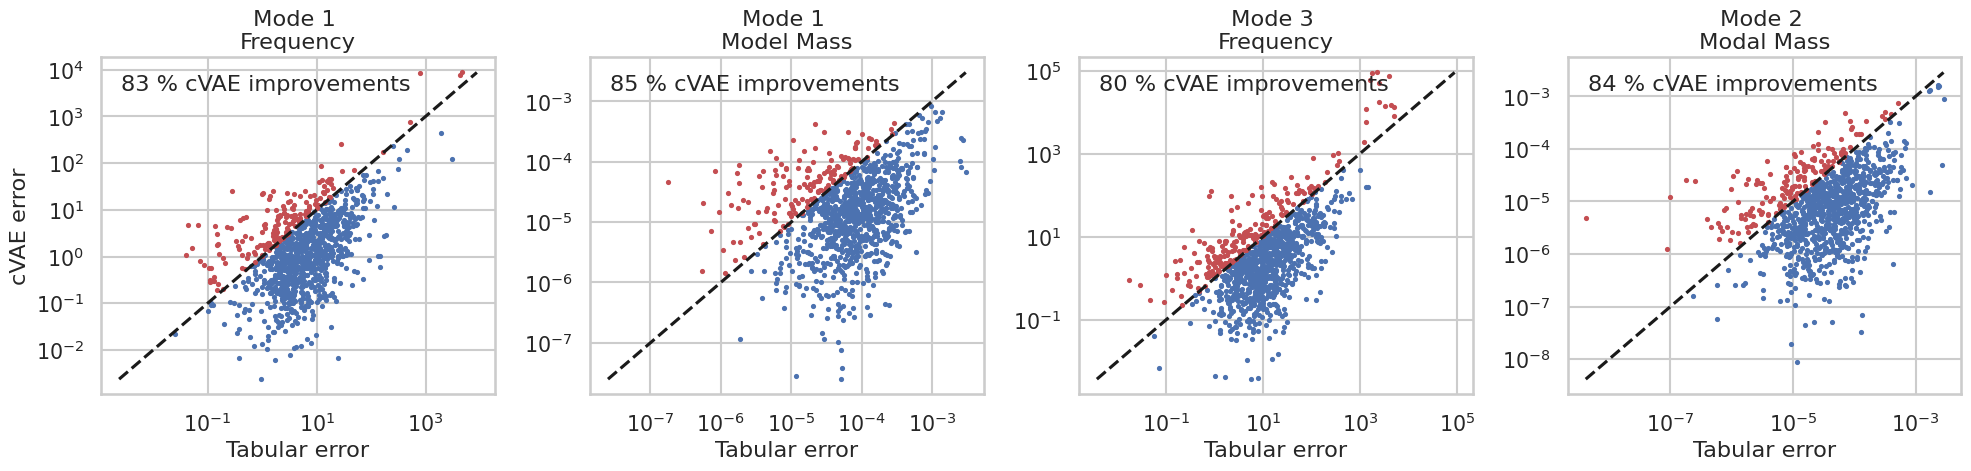

In [8]:
fig = plt.figure(figsize=(20, 5))
titles = ['Mode 1 \nFrequency', 'Mode 1 \nModel Mass', 'Mode 3 \nFrequency', 'Mode 2 \nModal Mass']
for idesign, design_attr in enumerate(dataset.y.keys()):
    ax = fig.add_subplot(1, 4, idesign+1)
    better_vae = look_up_error[:, idesign] >= cVAE_error[:, idesign]
    worse_vae = look_up_error[:, idesign] < cVAE_error[:, idesign]
    ratio = np.sum(better_vae) / look_up_error.shape[0]
    ax.scatter(look_up_error[better_vae, idesign], cVAE_error[better_vae, idesign], s=5, c='C0')
    ax.scatter(look_up_error[worse_vae, idesign], cVAE_error[worse_vae, idesign], s=5, c='C3')
    min_err, max_err = np.min([look_up_error[:, idesign], cVAE_error[:, idesign]]), np.max([look_up_error[:, idesign], cVAE_error[:, idesign]])
    ax.plot([min_err, max_err], [min_err, max_err], 'k--')
    ax.text(0.05, 0.9, f'{ratio*100:.0f} % cVAE improvements', transform=ax.transAxes)
    ax.set_title(titles[idesign])
    ax.set_xscale('log')
    ax.set_yscale('log')
    if idesign == 0:
        ax.set_ylabel('cVAE error')
    ax.set_xlabel('Tabular error')
plt.tight_layout()

In [9]:
df_dict = {}
for idesign, design_attr in enumerate(dataset.x.keys()):
    if design_attr in apply_log:
        #df_dict[design_attr+'_cVAE'] = 10 ** pred_design_data[design_attr][np.arange(len(Y_test))[:,None],0, top_designs][:,0]
        df_dict[design_attr+'_true'] = 10 ** dataset.x[design_attr].data[test_gen.dataset.indices,0]
    else:
        #df_dict[design_attr+'_cVAE'] = pred_design_data[design_attr][np.arange(len(Y_test))[:,None],0, top_designs][:,0]
        df_dict[design_attr+'_true'] = dataset.x[design_attr].data[test_gen.dataset.indices,0]
        
for idesign, design_attr in enumerate(dataset.x.keys()):
    if design_attr in apply_log:
        df_dict[design_attr+'_cVAE'] = 10 ** pred_design_data[design_attr][np.arange(len(Y_test))[:,None],0, top_designs][:,0]
        #df_dict[design_attr+'_true'] = 10 ** dataset.x[design_attr].data[test_gen.dataset.indices,0]
    else:
        df_dict[design_attr+'_cVAE'] = pred_design_data[design_attr][np.arange(len(Y_test))[:,None],0, top_designs][:,0]
        #df_dict[design_attr+'_true'] = dataset.x[design_attr].data[test_gen.dataset.indices,0]
    

In [10]:
import pandas as pd
df = pd.DataFrame(df_dict)
for idesign, design_attr in enumerate(dataset.y.keys()):
    df[design_attr[4:]+'_true'] = 10 ** Y_test[:, idesign]
for idesign, design_attr in enumerate(dataset.y.keys()):
    df[design_attr[4:]+'_cVAE'] = 10 ** pred_perf_data[design_attr][np.arange(len(Y_test))[:,None],0, top_designs][:,0]
df['design idx'] = test_gen.dataset.indices

In [11]:
df.to_csv(f'../data/paper/cVAE_testset_predictions_{len(train_gen.dataset)}traindesigns.csv', index=False)

In [12]:
dataset_tmp, apply_log_tmp = get_spiral_data(num_modes=2, data_fraction=1., only_freqs=False)
df_check = pd.DataFrame()
for iperf, perf_attr in enumerate(dataset_tmp.y.keys()):
    if 'MMY' in perf_attr:
        corr_fact = correction_factors['modal_mass']
    else:
        corr_fact = correction_factors['freqs']
    df_check[perf_attr] = 10 ** (dataset_tmp.y[perf_attr].data[:,0] + np.log10(corr_fact))

In [13]:
df_check.loc[test_gen.dataset.indices]

,log_M1_F,log_M1_MMY,log_M2_F,log_M2_MMY
4971,26.733160,0.002339,37.848494,0.001232
10130,58.669024,0.000741,135.412040,0.000334
6783,75.571236,0.000677,205.041494,0.000245
3600,43.247256,0.000847,65.331022,0.000335
6490,79.495270,0.001917,132.894142,0.001406
...,...,...,...,...
5734,187.687718,0.000475,563.397540,0.000102
5191,147.212722,0.000294,397.204840,0.000124
5390,50.883832,0.000195,88.786628,0.000109
860,60.089450,0.001245,144.277556,0.000763


In [16]:
df.columns

Index(['spiral_height_true', 'cs_half_width_true', 'cs_half_height_true',
       'spiral_scale_true', 'spiral_turns_true', 'cs_scale_true',
       'spiral_height_cVAE', 'cs_half_width_cVAE', 'cs_half_height_cVAE',
       'spiral_scale_cVAE', 'spiral_turns_cVAE', 'cs_scale_cVAE', 'M1_F_true',
       'M1_MMY_true', 'M2_F_true', 'M2_MMY_true', 'M1_F_cVAE', 'M1_MMY_cVAE',
       'M2_F_cVAE', 'M2_MMY_cVAE', 'design idx'],
      dtype='object')

In [15]:
dataset[-2]

{'spiral_height': array([[8.2815]]),
 'cs_half_width': array([[0.18867542]]),
 'cs_half_height': array([[0.18304196]]),
 'spiral_scale': array([[5.8563]]),
 'spiral_turns': array([[0.21708895]]),
 'cs_scale': array([[0.20690679]]),
 'log_M1_F': array([[2.41081096]]),
 'log_M1_MMY': array([[-1.97249621]]),
 'log_M2_F': array([[2.85712736]]),
 'log_M2_MMY': array([[-2.48196673]])}